In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("G:\Assignments\EDA\Data Sets\Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

In [7]:
#Slicing Operation of a Data Frame
k = 2
size = 125
for i in range(k):
    df = data[size*i:size*(i+1)]
    df.to_csv(f'Reg_{i+1}.csv', index=False)

br_data = pd.read_csv("Reg_1.csv")
bar_data = pd.read_csv("Reg_2.csv")
br_data = br_data.drop([122,123,124])
br_data.to_csv("Reg_1.csv")
bar_data.to_csv("Reg_2.csv")
bar_data = pd.read_csv("Reg_2.csv")
br_data = pd.read_csv("Reg_1.csv")
bar_data = bar_data.drop("Unnamed: 0",axis=1)
br_data = br_data.drop("Unnamed: 0",axis=1)

In [11]:
br_data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [28]:
x_br = br_data.drop(['Temperature','Classes  '],axis=1)

In [78]:
x_br

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,2012,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,2012,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,2012,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [14]:
y_br = br_data['Temperature']

In [79]:
y_br

0      29
1      29
2      26
3      25
4      27
       ..
117    31
118    31
119    32
120    26
121    25
Name: Temperature, Length: 122, dtype: int64

In [29]:
x_bar = bar_data.drop(['Temperature','Classes  '],axis=1)

In [80]:
x_bar

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,2,6,2012,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,3,6,2012,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,4,6,2012,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,5,6,2012,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
118,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
119,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
120,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [137]:
y_bar = bar_data['Temperature']

In [81]:
y_bar

0      32
1      30
2      29
3      30
4      32
       ..
117    30
118    28
119    27
120    24
121    24
Name: Temperature, Length: 122, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
x_br_train, x_br_test, y_br_train, y_br_test = train_test_split(x_br,y_br,test_size=0.33,random_state=42)
x_bar_train, x_bar_test, y_bar_train, y_bar_test = train_test_split(x_bar,y_bar,test_size=0.33,random_state=42)

In [110]:
x_bar_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
33,4,7,2012,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9
25,26,6,2012,62,16,0.0,87.8,16.5,34.5,7.0,16.4,9.5
70,10,8,2012,39,15,0.2,89.3,15.8,35.4,8.2,15.8,10.7
28,29,6,2012,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2
120,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8
14,15,6,2012,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6
92,1,9,2012,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0
51,22,7,2012,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4


In [111]:
x_br_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
33,4,7,2012,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7
25,26,6,2012,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6
70,10,8,2012,55,14,0.0,88.9,18.6,67.0,7.4,21.9,11.6
28,29,6,2012,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9
120,29,9,2012,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,15,6,2012,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,1,9,2012,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
51,22,7,2012,79,18,0.1,73.4,16.4,79.9,1.8,21.7,2.8


In [112]:
y_br_train

33     33
25     31
70     35
28     32
120    26
       ..
106    24
14     28
92     25
51     28
102    30
Name: Temperature, Length: 81, dtype: int64

In [113]:
y_bar_train

33     34
25     36
70     39
28     37
120    24
       ..
106    32
14     28
92     29
51     32
102    30
Name: Temperature, Length: 81, dtype: int64

In [114]:
y_br_test

18     31
45     28
47     31
89     35
4      27
40     33
62     35
107    30
31     27
55     36
53     28
119    32
10     31
90     35
109    32
11     26
76     36
56     36
115    29
0      29
26     34
44     30
66     32
98     31
24     31
42     34
105    22
93     22
36     35
100    30
12     27
15     29
72     35
22     32
116    26
91     28
83     36
30     29
77     37
65     34
9      28
Name: Temperature, dtype: int64

In [115]:
y_bar_test

18     32
45     31
47     33
89     35
4      32
40     34
62     40
107    33
31     33
55     35
53     33
119    27
10     31
90     34
109    36
11     27
76     40
56     29
115    26
0      32
26     36
44     34
66     30
98     31
24     34
42     39
105    28
93     28
36     38
100    30
12     30
15     29
72     39
22     33
116    28
91     30
83     36
30     28
77     42
65     34
9      30
Name: Temperature, dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler
br_scaler=StandardScaler()
bar_scaler=StandardScaler()

In [118]:
x_br_train = br_scaler.fit_transform(x_br_train)
x_bar_train = bar_scaler.fit_transform(x_bar_train)

In [119]:
x_br_test = br_scaler.transform(x_br_test)
x_bar_test = bar_scaler.transform(x_bar_test)

In [120]:
from sklearn.linear_model import LinearRegression
br_regression = LinearRegression()
bar_regression = LinearRegression()

In [139]:
br_regression.fit(x_br_train,y_br_train)

LinearRegression()

In [122]:
bar_ridge_regression.fit(x_bar_train,y_bar_train)

LinearRegression()

In [124]:
br_reg_pred = br_regression.predict(x_br_test)

In [128]:
br_residual = y_br_test - br_reg_pred
print(br_residual)

18    -1.834709
45    -3.849074
47    -0.679040
89    -4.197072
4     -4.508320
40     2.053341
62     1.166164
107   -1.454381
31    -3.699705
55     3.624115
53     1.106116
119    0.639482
10    -2.654993
90     9.988085
109    0.685379
11    -6.127119
76     4.338046
56     1.286549
115   -0.037346
0     -5.053393
26     0.632030
44     1.354347
66     0.625445
98     0.688741
24    -1.408706
42     3.098323
105   -3.816864
93    -0.105695
36     1.613389
100    0.951989
12     0.017484
15     3.093240
72     0.817060
22    -0.385156
116    1.744597
91     8.803528
83    -0.587326
30    -2.770071
77     4.338119
65     2.088719
9     -2.277377
Name: Temperature, dtype: float64


In [125]:
bar_reg_pred = bar_regression.predict(x_bar_test)

In [129]:
bar_residual = y_bar_test - bar_reg_pred
print(bar_residual)

18     -0.158951
45     -0.840571
47     -0.526826
89      3.506320
4      -1.195408
40      1.290020
62     -0.281804
107    -4.877599
31     -2.007569
55      0.674315
53      0.785607
119     8.895412
10     -4.629481
90      1.408617
109     1.080193
11     -7.697138
76      2.572748
56     -0.546449
115    -8.653665
0       0.671545
26      1.235781
44     -1.409107
66     -3.219051
98     -0.537792
24      1.178517
42      4.280577
105    -3.140392
93     -0.151607
36      2.882468
100    -0.856660
12     -3.495238
15      1.110760
72      0.669898
22      1.751761
116    -2.438280
91     -0.450114
83      1.629148
30     -1.590201
77      1.159238
65    -15.610227
9      -6.385702
Name: Temperature, dtype: float64


In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_br_test,br_reg_pred))
print(np.sqrt(mean_squared_error(y_br_test,br_reg_pred)))
print(mean_absolute_error(y_br_test,br_reg_pred))


10.82078187771224
3.2894956874439343
2.4439178580745633


In [131]:
print(mean_squared_error(y_bar_test,bar_reg_pred))
print(np.sqrt(mean_squared_error(y_bar_test,bar_reg_pred)))
print(mean_absolute_error(y_bar_test,bar_reg_pred))

16.036198646805406
4.004522274479867
2.621530641920593


In [133]:
from sklearn.metrics import r2_score
br_score = r2_score(y_br_test,br_reg_pred)
print(br_score)

0.2160273107303562


In [134]:
bar_score = r2_score(y_bar_test,bar_reg_pred)
print(bar_score)

-0.052179934632314184


Text(0, 0.5, 'Test Predicted Data')

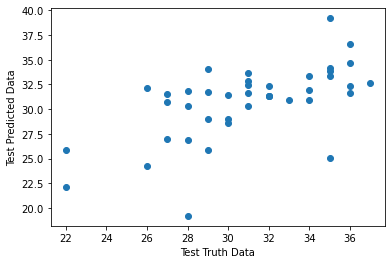

In [135]:
plt.scatter(y_br_test,br_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

Text(0, 0.5, 'Test Predicted Data')

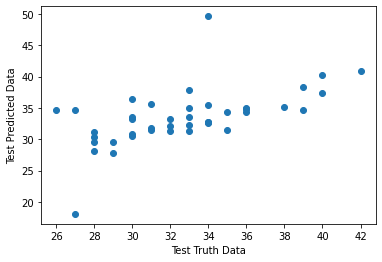

In [136]:
plt.scatter(y_bar_test,bar_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")